# Product Sales

### Pens and Printers
**Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies**

### New Product Sales Methods
Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.
>> **Email**: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.<< 

>>**Call**: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.

>>**Email and call**: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 1 - Data validation 
>> Describe validation and cleaning steps for every column in the data

In [60]:
data = pd .read_csv("product_sales.csv")
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [61]:
print("unique values for sales_method before validation : ",data["sales_method"].unique())
data["sales_method"] = data["sales_method"].replace(['email','em + call' ],['Email','Email + Call'])
print("unique values for sales_method after validation : ",data["sales_method"].unique())

unique values for sales_method before validation :  ['Email' 'Email + Call' 'Call' 'em + call' 'email']
unique values for sales_method after validation :  ['Email' 'Email + Call' 'Call']


In [62]:
data["revenue"] =round(data["revenue"],2)
(data["revenue"] <0).sum()

0

In [63]:
print(data[(data["years_as_customer"]>=0) & (data["years_as_customer"]>=(2025-1984))]["years_as_customer"] )
data = data[data["years_as_customer"] <= 41]

13741    63
13800    47
Name: years_as_customer, dtype: int64


In [64]:
valid_states = {
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
}
set(data["state"].unique()) - valid_states

set()

In [65]:
data.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [66]:
data.duplicated().sum()

0

In [67]:
data.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [68]:
data["revenue"] = data.groupby(["sales_method", "state"])["revenue"].transform(
    lambda x: x.fillna(x.median())
)
data.isnull().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

1. Column Types
   
>> Verified correct data types for all columns.
>> Example: week as int64, sales_method as object, revenue as float64, etc.

2. Missing Values
   
>> Checked for missing values using .isnull().sum().
>> Found 1074 missing values in revenue.
>> Imputed missing revenue values (method depends on your choice — mean/median or another strategy).

3. Standardization of Categorical Values

>> Normalized inconsistent entries in sales_method.
>> Replaced 'email', 'em + call' with 'Email', 'Email + Call'.

4. Duplicates

>> Checked for duplicated rows and duplicate customer_ids (none found).

5. Validation of Numeric Ranges

>> *Ensured:*
>> nb_sold >= 0
>> revenue >= 0 (after rounding)
>> years_as_customer within logical bounds (e.g., not > current year - 1984)

6. State Validation

>> Checked state column for unexpected values — all are valid US states.

7. Week Column

>> Confirmed values are integers between 1 and 6.
>> Checked for nulls and zeros — none found.

 ## 2 - Exploratory Analysis to answer the customer questions

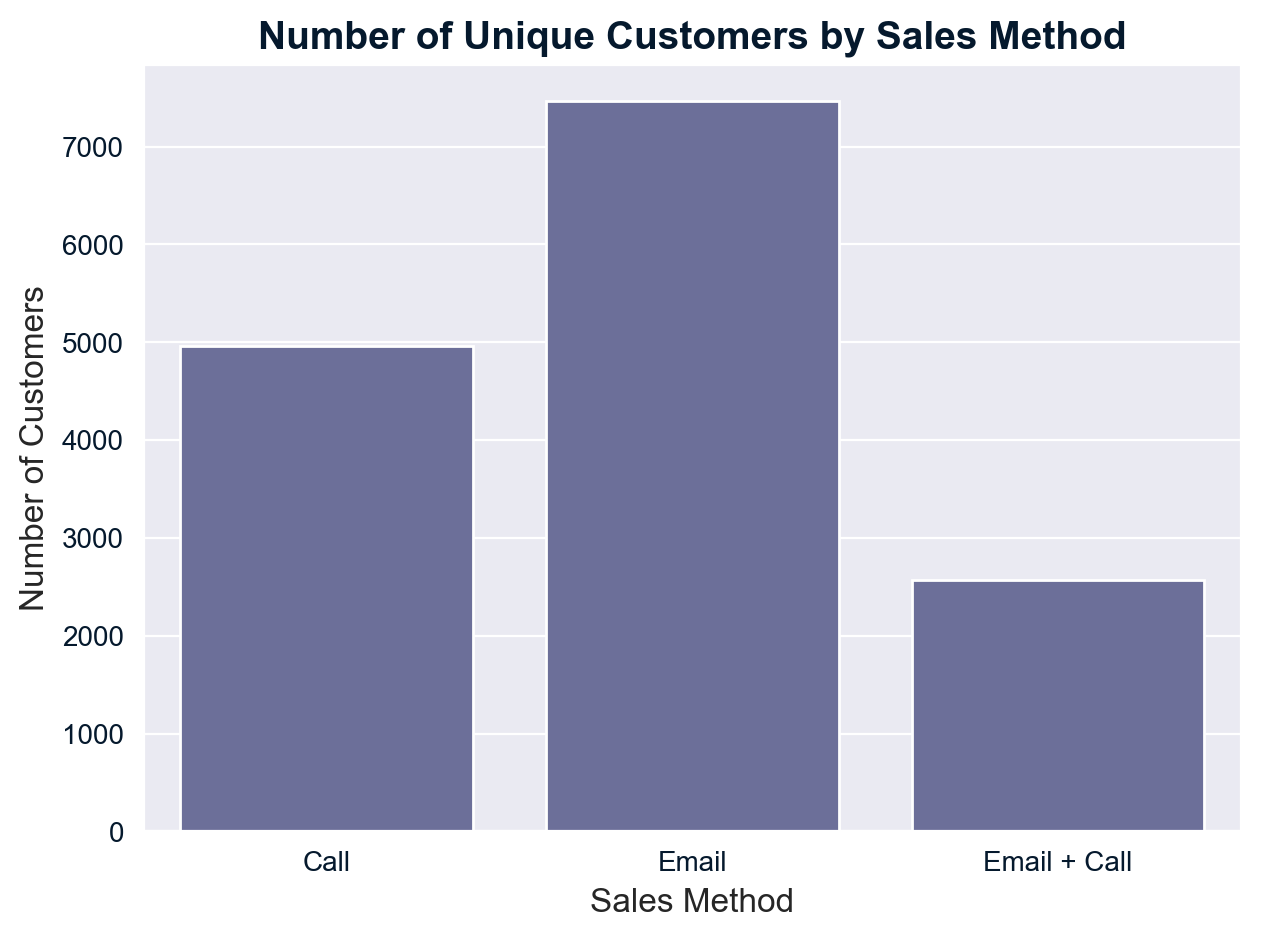

In [69]:
# q1 - How many customers were there for each approach?

x=data.groupby("sales_method")["customer_id"].nunique().reset_index()

sns.barplot(
    data=x,
    x="sales_method",
    y="customer_id"
)
plt.title("Number of Unique Customers by Sales Method", fontsize=14, fontweight="bold")
plt.xlabel("Sales Method", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()

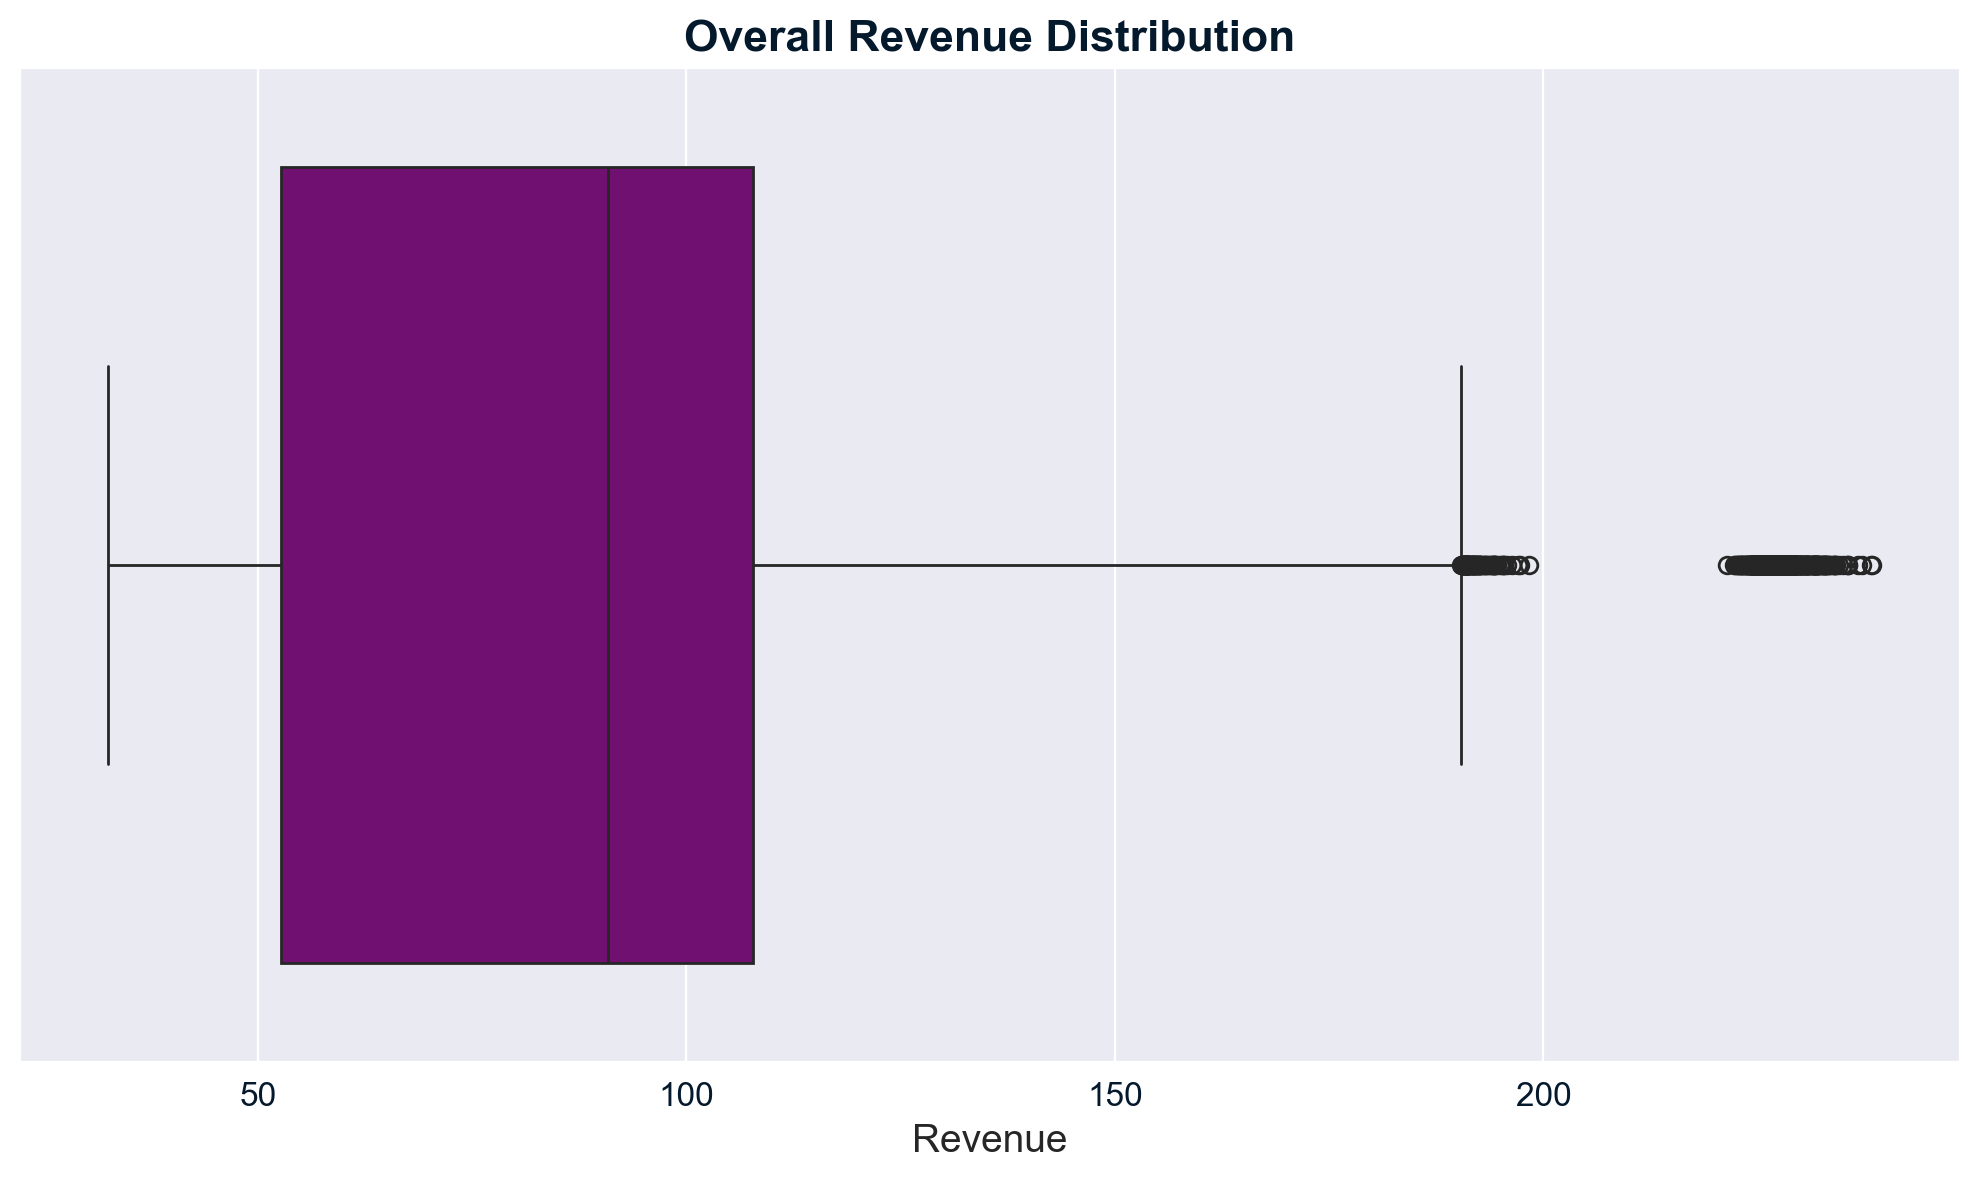

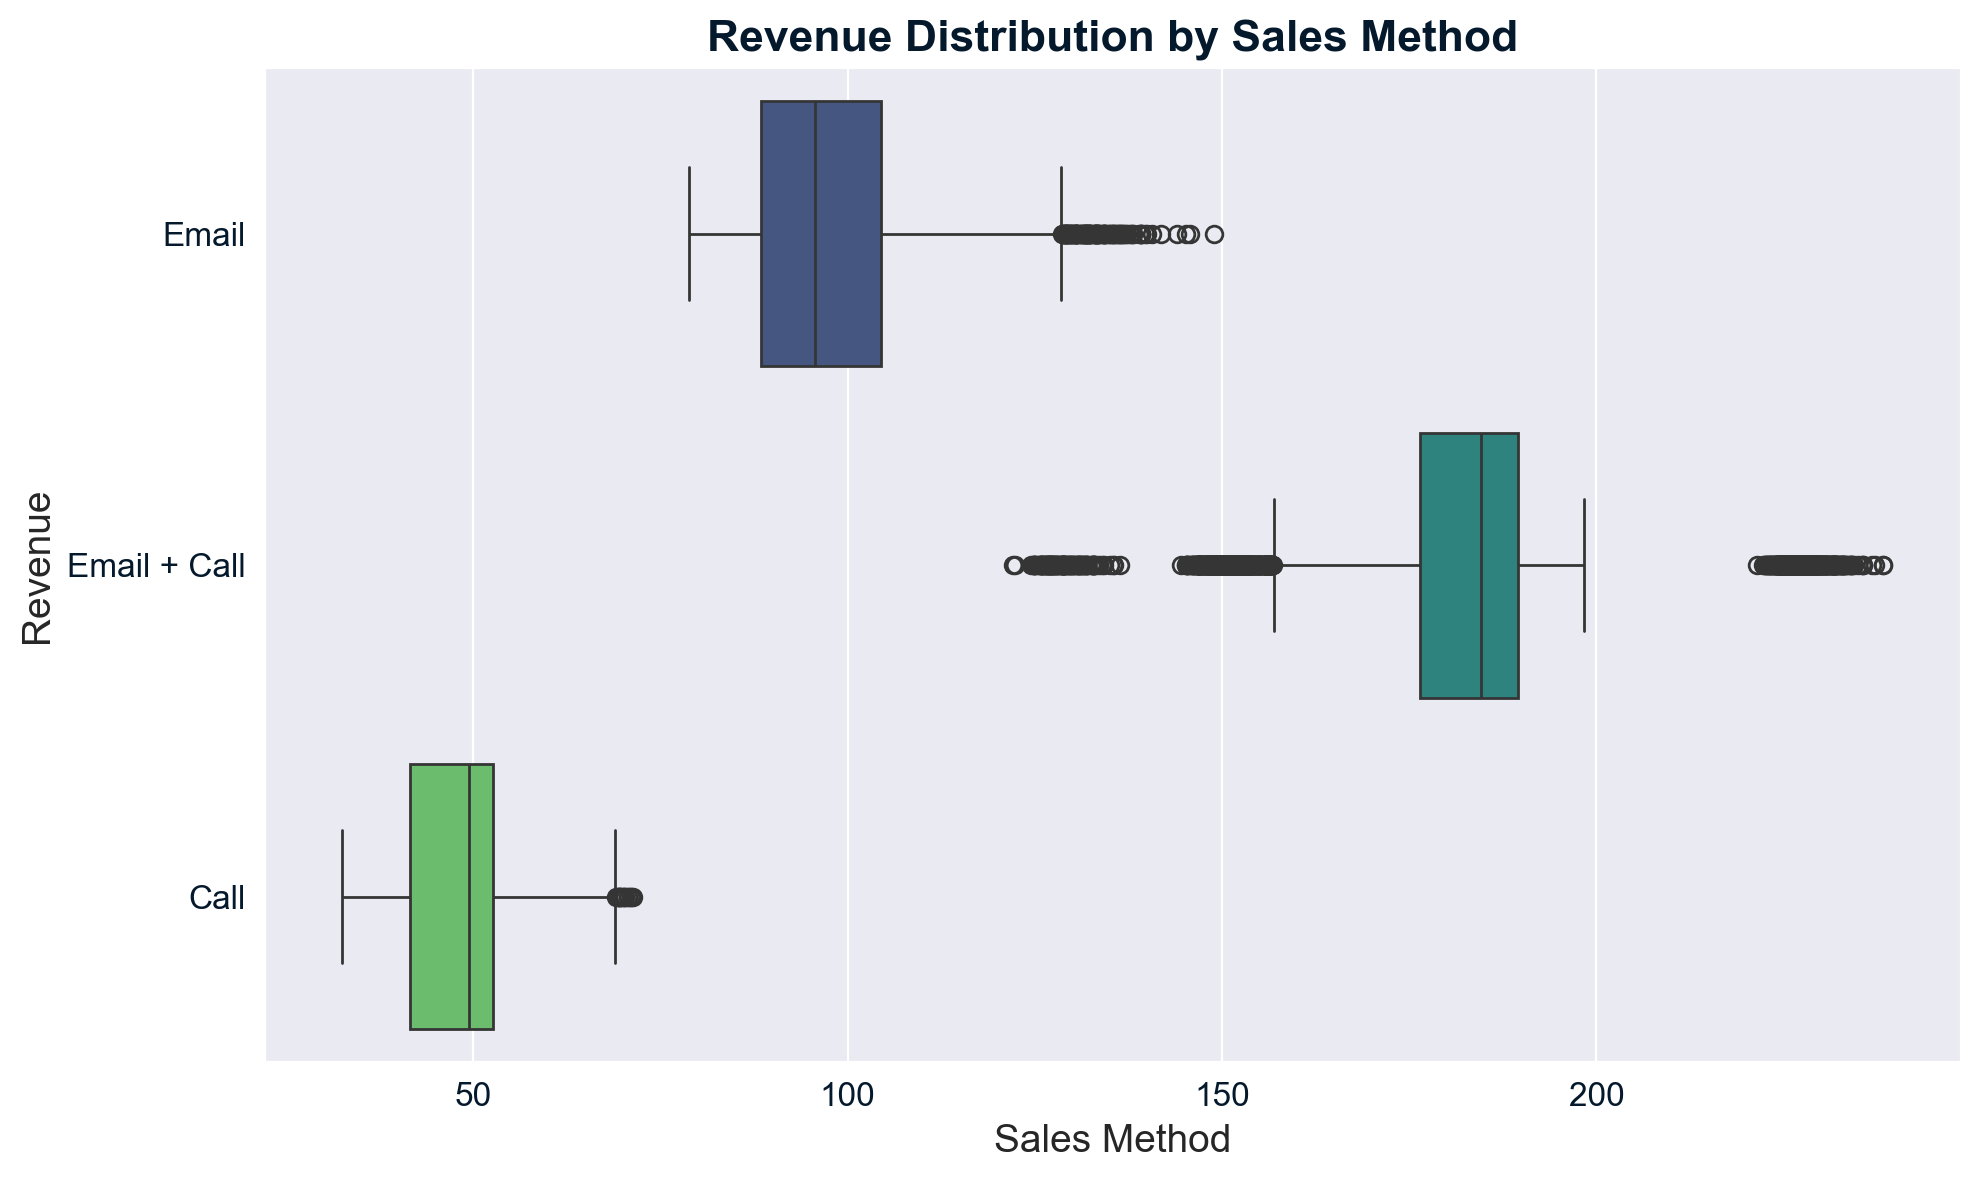

In [70]:
# Q2 - What does the spread of the revenue look like overall? And for each method?

sns.set_style("darkgrid")

# Overall revenue spread
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="revenue",
    color='purple'
)
plt.title("Overall Revenue Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.tight_layout()

# Revenue spread by sales method
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    y="sales_method",
    x="revenue",
    palette="viridis"
)
plt.title("Revenue Distribution by Sales Method", fontsize=16, fontweight="bold")
plt.xlabel("Sales Method", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

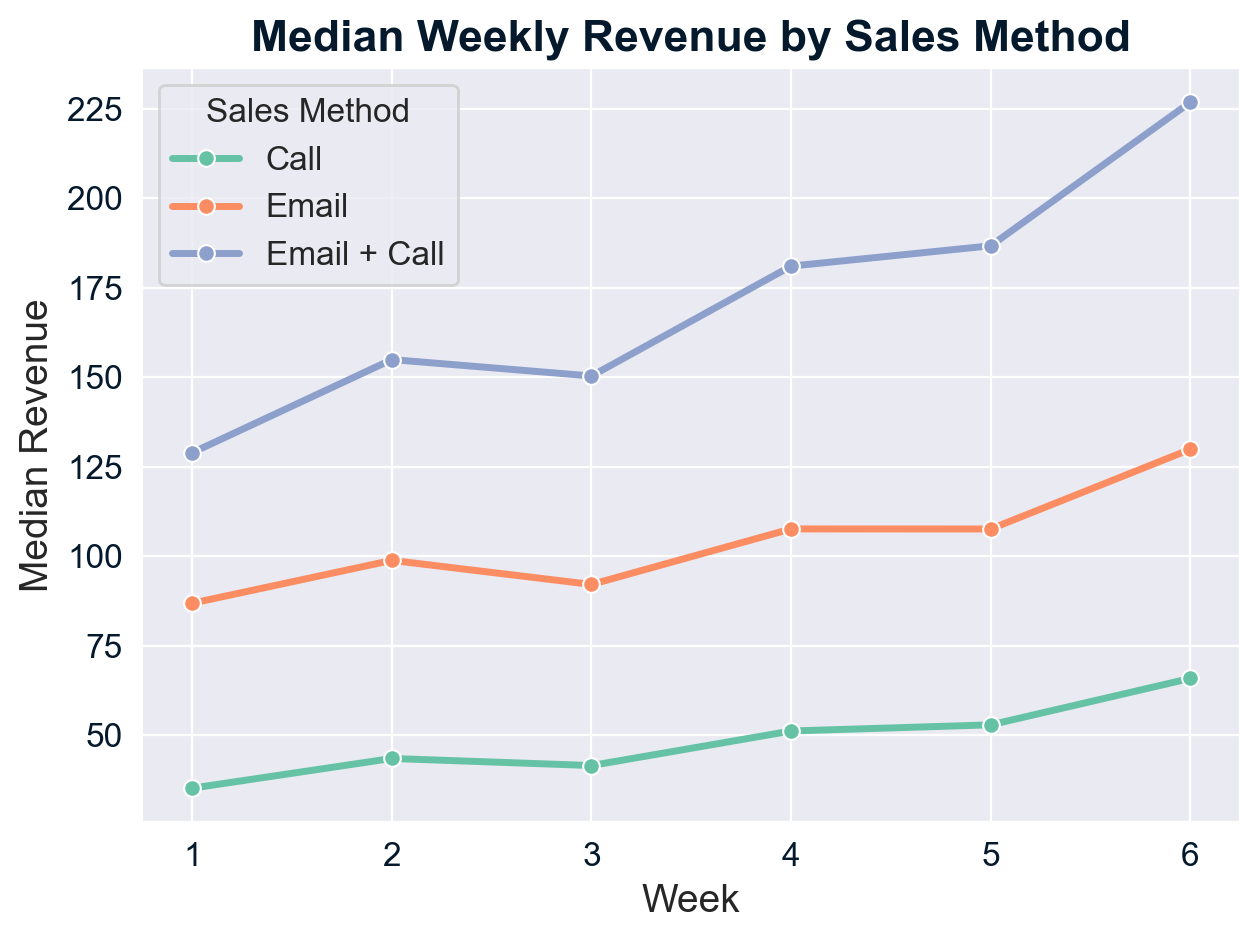

In [71]:
# Q3 - Was there any difference in revenue over time for each of the methods?

median_reven = data.groupby(["sales_method", "week"])["revenue"].median().reset_index()

sns.lineplot(
    data=median_reven,
    x="week",
    y="revenue",
    hue="sales_method",
    marker="o",
    linewidth=2.5,
    palette="Set2"
)

plt.title("Median Weekly Revenue by Sales Method", fontsize=16, weight='bold')
plt.xlabel("Week", fontsize=14)
plt.ylabel("Median Revenue", fontsize=14)
plt.legend(title="Sales Method", fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

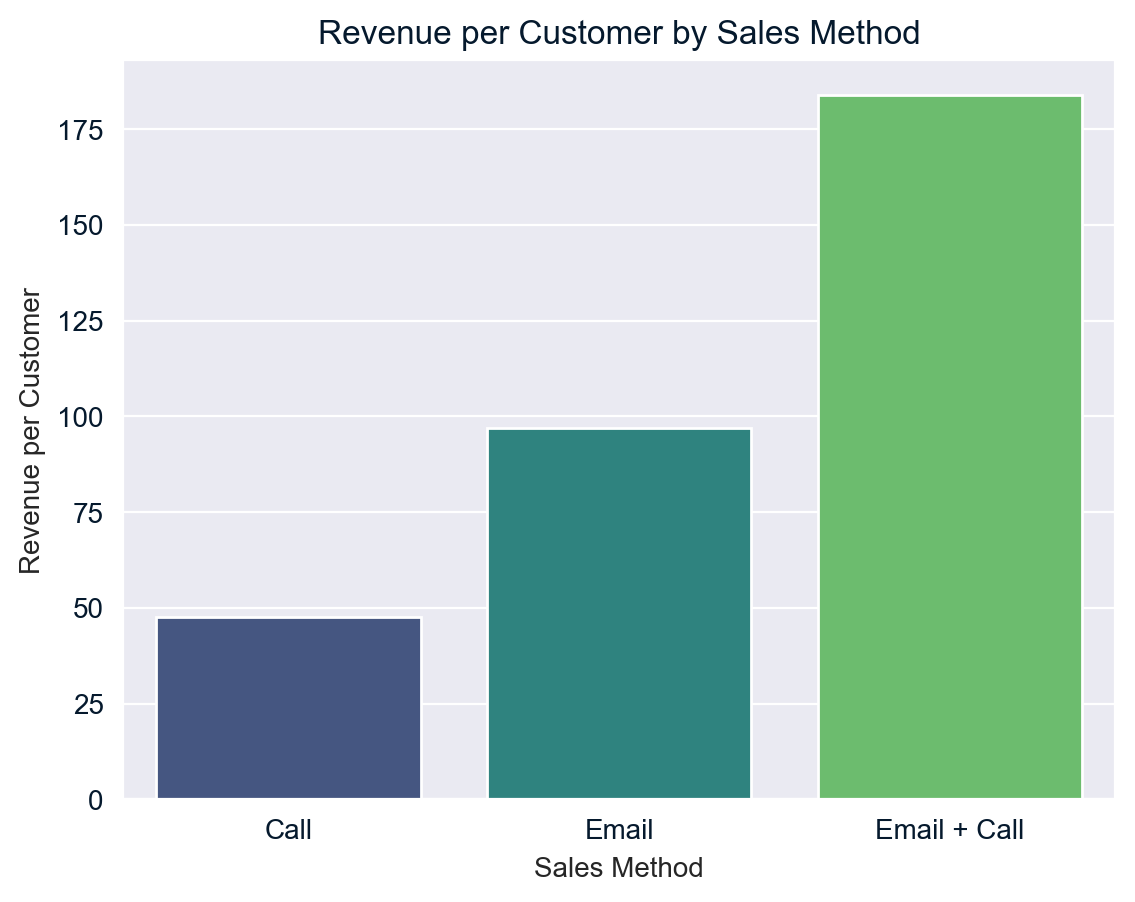

In [72]:
# Q-4 Based on the data, which method would you recommend we continue to use?
rev_per_cust = (
    data.groupby("sales_method")
    .agg(total_revenue=("revenue", "sum"),
         customers=("customer_id", "nunique"))
    .reset_index()
)

rev_per_cust["rev_per_customer"] = rev_per_cust["total_revenue"] / rev_per_cust["customers"]

sns.barplot(data=rev_per_cust, x="sales_method", y="rev_per_customer", palette="viridis")
plt.title("Revenue per Customer by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue per Customer")
plt.show()

### conclusion answers :

**Q1 - How many customers were there for each approach?**
>> we can see that around 50% of our customers in the Emalil method and this expexted because the method like you said in the report is the easyist method

**Q2 - What does the spread of the revenue look like overall? And for each method?**
>> we can see from the boxplots the the first one show the whole spread of the revenue and it has some outliars from using different methods to gain this revenue , and secod box plot show the spread of each method and we can see that the **(Email+call)** method has many outlaires also has the highist Q1,Q2(median),Q3

**Q3 - Was there any difference in revenue over time for each of the methods?**
>> yes Revenue generally increased over the six weeks, but we can see that the **(Email+call)** method has the haighist revenues over the 6 weeks

**Q-4 Based on the data, which method would you recommend we continue to use?**
>> Although the **(Email+call)** method has the fewest customers, it delivers the highest revenue per customer. Calls require more effort, so combining them strategically with email could reduce effort while maintaining strong revenue growth.

## 3 - Definition of a metric for the business to monitor

<AxesSubplot: xlabel='years_as_customer', ylabel='revenue'>

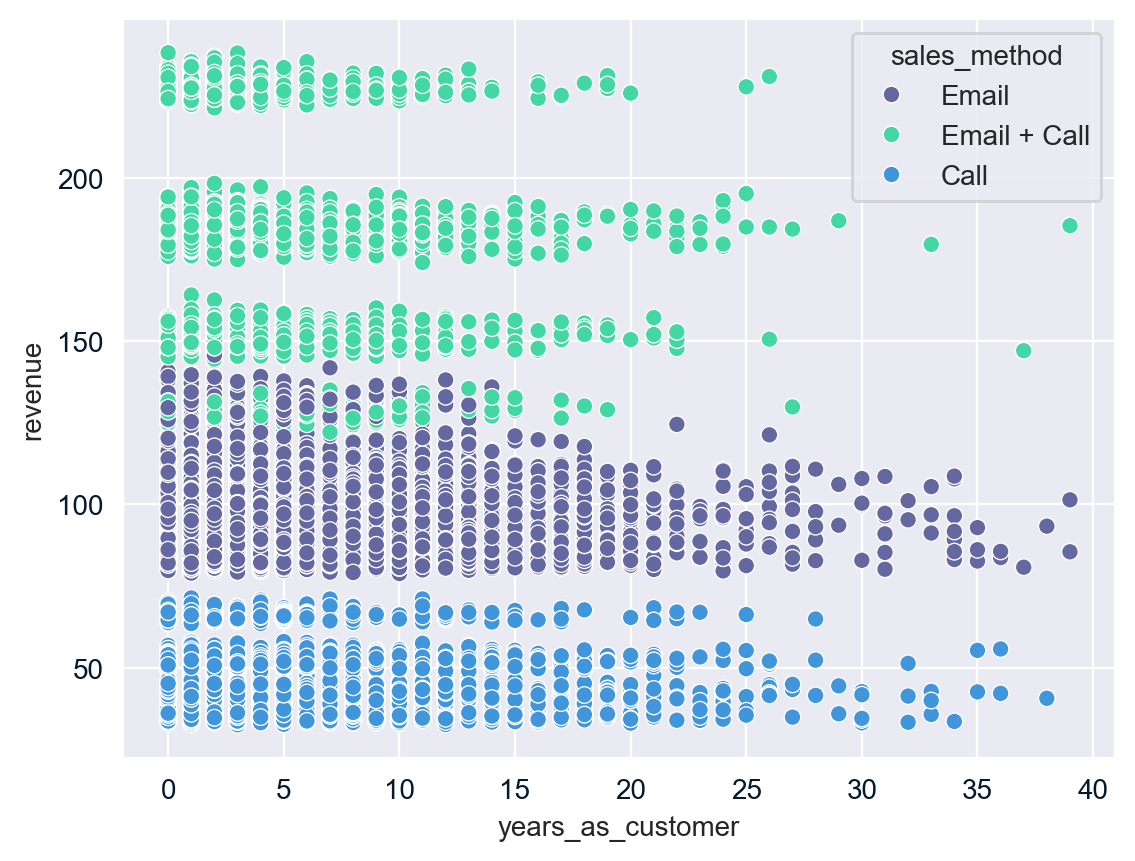

In [73]:
sns.scatterplot(data= data , x="years_as_customer" , y="revenue", hue="sales_method")


**from the upper plot i notise that old customers has lower revenue than new ones**

In [74]:
data['tenure_group'] = data['years_as_customer'].apply(lambda x: 'New' if x <= 1 else 'Existing')

arpc_table = (
    data.groupby(['sales_method', 'tenure_group'])
      .agg(total_revenue=('revenue', 'sum'),
           n_customers=('customer_id', 'nunique'))
      .reset_index()
)

arpc_table['ARPC'] = arpc_table['total_revenue'] / arpc_table['n_customers']
arpc_table = arpc_table.sort_values(['ARPC'], ascending=False)
arpc_table


,sales_method,tenure_group,total_revenue,n_customers,ARPC
5,Email + Call,New,145831.745,784,186.009879
4,Email + Call,Existing,326785.350,1788,182.765856
3,Email,New,189491.800,1935,97.928579
2,Email,Existing,534756.290,5530,96.700957
1,Call,New,61478.350,1256,48.947731
0,Call,Existing,174740.400,3705,47.163401


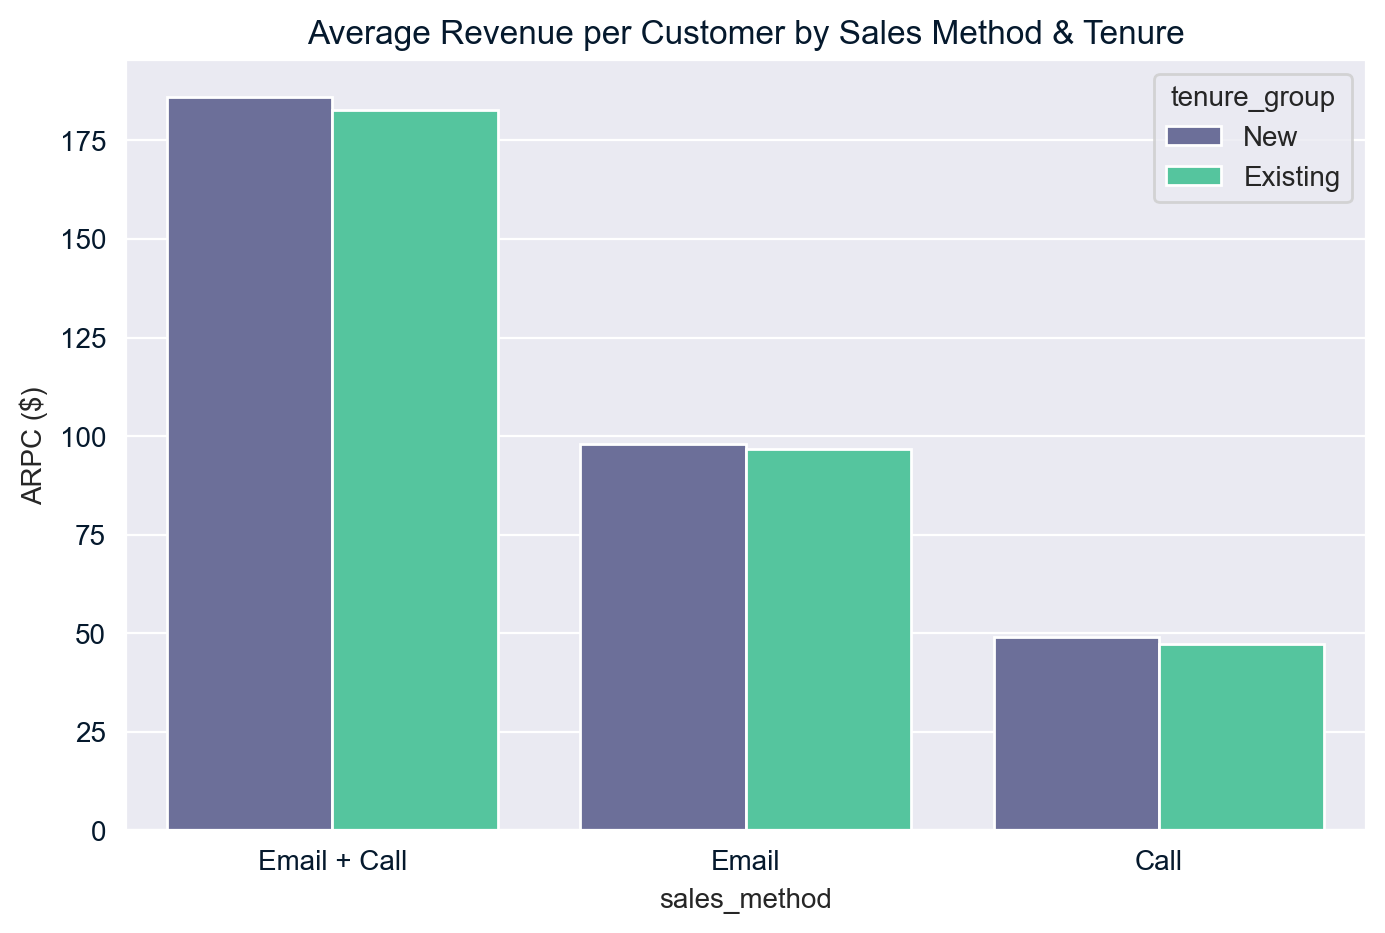

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(data=arpc_table, x='sales_method', y='ARPC', hue='tenure_group')
plt.title('Average Revenue per Customer by Sales Method & Tenure')
plt.ylabel('ARPC ($)')
plt.show()

In [76]:
from scipy.stats import ttest_ind


results = []

for method in data['sales_method'].unique():
    new_group = data[(data['sales_method'] == method) & (data['tenure_group'] == 'New')]['revenue']
    existing_group = data[(data['sales_method'] == method) & (data['tenure_group'] == 'Existing')]['revenue']
    
    stat, pval = ttest_ind(new_group, existing_group, nan_policy='omit', equal_var=False)
    results.append({
        'sales_method': method,
        'mean_new': new_group.mean(),
        'mean_existing': existing_group.mean(),
        't_statistic': stat,
        'p_value': pval
    })

ttest_df = pd.DataFrame(results)
ttest_df
# alph =0.05 if p_val less than so there is a diff in revenue between old customers and new ones

,sales_method,mean_new,mean_existing,t_statistic,p_value
0,Email,97.928579,96.700957,4.237843,2.318795e-05
1,Email + Call,186.009879,182.765856,2.833064,4.670849e-03
2,Call,48.947731,47.163401,6.343224,2.750519e-10


### Definition of a Metric for the Business to Monitor

**Metric:**  
Average Revenue per Customer (ARPC), segmented by sales method and customer tenure (New vs. Existing).

**Reason:**  
Statistical testing (t-test) shows a significant difference in revenue between new and long-term customers (p-value << 0.05).  
This means customer tenure has a measurable impact on revenue and should be included in monitoring.  
By tracking ARPC separately for each sales method and tenure group, the business can identify not only the most effective sales strategy but also how it performs for different customer segments.

**Formula:**  
ARPC = Total Revenue in Period / Number of Unique Customers in Period  
Calculated weekly for each sales method and tenure group.

**Initial Values from Current Data:**  

| Sales Method  | Tenure Group | Total Revenue ($) | Customers | ARPC ($) |
|---------------|--------------|-------------------|-----------|----------|
| Email + Call  | New          | 145,831.75        | 784       | 186.01   |
| Email + Call  | Existing     | 326,785.35        | 1,788     | 182.77   |
| Email         | New          | 189,491.80        | 1,935     | 97.93    |
| Email         | Existing     | 534,756.29        | 5,530     | 96.70    |
| Call          | New          | 61,478.35         | 1,256     | 48.95    |
| Call          | Existing     | 174,740.40        | 3,705     | 47.16    |

**Monitoring Plan:**  
- Update ARPC weekly for each sales method and tenure group.  
- Investigate strategies to raise ARPC for long-term customers while maintaining performance for new customers.  
- Use weekly trends to assess the impact of any changes in sales approach.


## 4 - Final summary including recommendations that the business should undertake

### Final Summary & Recommendations

**Summary of Findings:**  
- **Sales Method Performance:** Email + Call consistently delivers the highest Average Revenue per Customer (ARPC), both for new and long-term customers.  
- **Customer Tenure Impact:** Statistical testing confirmed a significant difference (p-value << 0.05) in revenue between new and existing customers, with new customers generating slightly higher ARPC overall.  
- **Geography & Website Visits:** Average sales were similar across states and showed no strong correlation with website visits, indicating these factors are less influential for this product line.  
- **Effort vs. Return:** Pure Call method yields the lowest ARPC, making it the least efficient considering the higher time investment required.

**Recommendations:**  
1. **Prioritize Email + Call for high-value segments** — Continue using Email + Call for customers with the highest potential revenue, especially new customers.  
2. **Optimize sales effort allocation** — Reduce the use of Call-only method and redirect resources toward mixed or email-based approaches.  
3. **Retention strategy for existing customers** — Develop targeted offers or communication strategies to boost engagement and ARPC for long-term customers.  
4. **Regular KPI Monitoring** — Track ARPC weekly by sales method and tenure group to quickly detect performance shifts.  

